# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [31]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [34]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Wait for the page to load (you can adjust the wait time as needed)
browser.is_element_present_by_css('div#content', wait_time=10)

# Get the page source
html = browser.html



### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [35]:
# Create a Beautiful Soup Object

soup = BeautifulSoup(html, 'html.parser')

In [36]:
# Extract all rows of data

# Find the table containing the data
table = soup.find('table')

# Extract the table rows
rows = table.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows


# Loop through the rows and extract the data
for row in rows[1:]:  # Skip the header row (index 0)
    columns = row.find_all('td')
    row_data = [column.text.strip() for column in columns]
    data.append(row_data)

row_data

['1895', '2018-02-27', '1977', '135', '5', '-77.0', '727.0']

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Print the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [ ]:
# Confirm DataFrame was created successfully


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
print("Original Data Types:")
print(df.dtypes)


Original Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Convert 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [14]:
# Change data types for data analysis
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [15]:
# Confirm type changes were successful by examining data types again
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?


In [16]:
# Extract the month and day from the 'terrestrial_date' column
df['month'] = df['terrestrial_date'].dt.month
df['day'] = df['terrestrial_date'].dt.day

# Group the data by 'month' and 'day' and count unique 'terrestrial_date' values
month_counts = df.groupby('month')['day'].nunique().reset_index()

# Rename columns for clarity
month_counts.columns = ['Month', 'Number of Days']

# Print the result
print(month_counts)

    Month  Number of Days
0       1              31
1       2              29
2       3              31
3       4              30
4       5              31
5       6              30
6       7              31
7       8              31
8       9              30
9      10              31
10     11              30
11     12              31


In [ ]:
# 2. How many Martian days' worth of data are there?


In [18]:
df['month'] = df['terrestrial_date'].dt.month

# Calculate the number of unique months
unique_months = df['month'].nunique()

# Group the data by 'month' and count the number of days in each month
month_days = df.groupby('month')['terrestrial_date'].nunique()

# Print the number of unique months and the number of days in each month
print("Number of Unique Months on Mars:", unique_months)
print("\nNumber of Days in Each Month:")
print(month_days)

Number of Unique Months on Mars: 12

Number of Days in Each Month:
month
1     174
2     154
3     126
4     142
5     143
6     146
7     141
8     155
9     174
10    181
11    158
12    173
Name: terrestrial_date, dtype: int64


In [ ]:
# 3. What is the average low temperature by month?


In [19]:
df['month'] = df['terrestrial_date'].dt.month

# Calculate the average low temperature by month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average Low Temperature by Month:")
print(average_low_temp_by_month)

Average Low Temperature by Month:
month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64


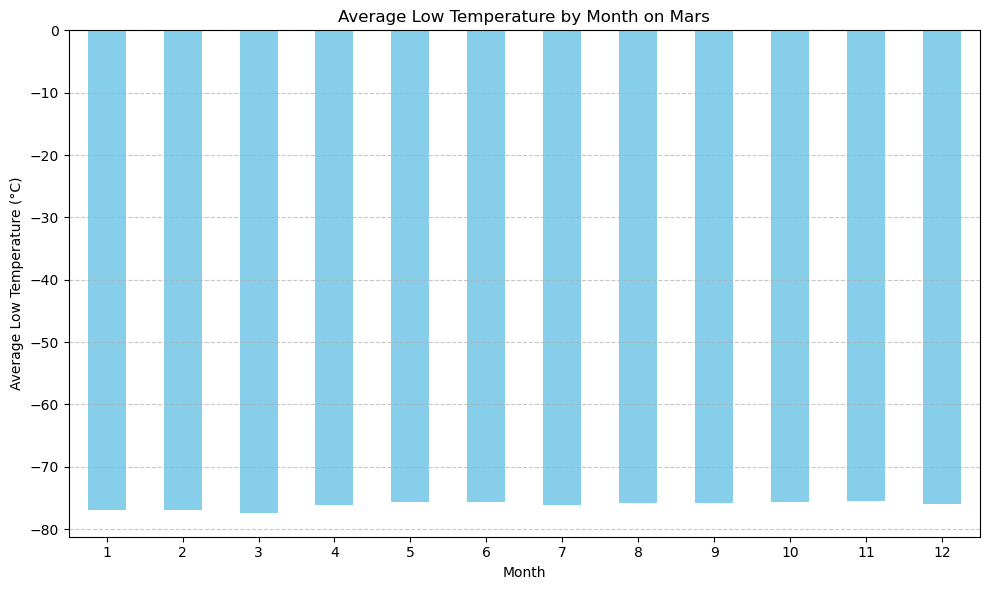

In [20]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

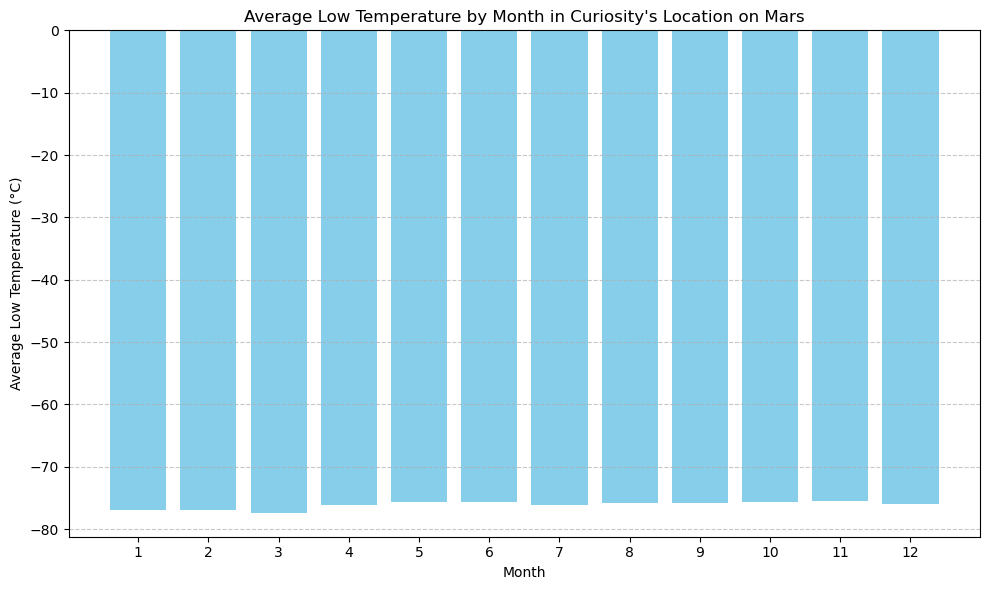

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated the average low temperature by month as shown in a previous response

# Create a DataFrame for the full year data (for plotting)
full_year_data = pd.DataFrame({'Month': range(1, 13), 'Temperature (°C)': average_low_temp_by_month})

# Plot the full year data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(full_year_data['Month'], full_year_data['Temperature (°C)'], color='skyblue')
plt.title('Average Low Temperature by Month in Curiosity\'s Location on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(full_year_data['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# 4. Average pressure by Martian month


In [25]:
# Extract the month from the 'terrestrial_date' column
df['month'] = df['terrestrial_date'].dt.month

# Calculate the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print("Average Pressure by Martian Month:")
print(average_pressure_by_month)


Average Pressure by Martian Month:
month
1     861.258621
2     837.967532
3     827.722222
4     817.676056
5     803.601399
6     807.910959
7     822.510638
8     829.606452
9     845.586207
10    865.475138
11    875.481013
12    875.260116
Name: pressure, dtype: float64


In [ ]:
# Plot the average pressure by month


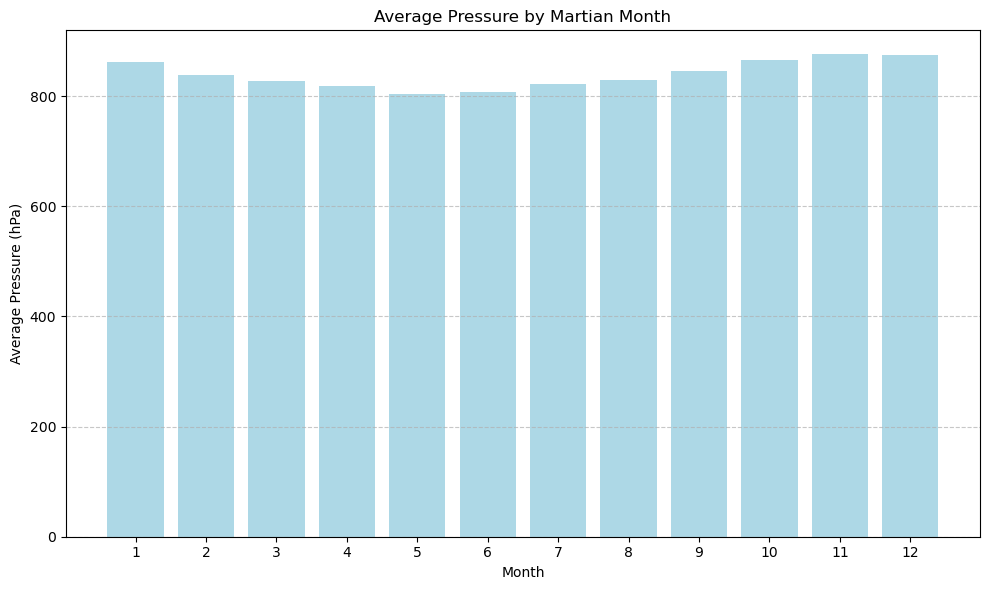

In [27]:
# Create a DataFrame for the average pressure data
average_pressure_data = pd.DataFrame({'Month': average_pressure_by_month.index, 'Average Pressure (hPa)': average_pressure_by_month.values})

# Plot the average pressure by month as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_data['Month'], average_pressure_data['Average Pressure (hPa)'], color='lightblue')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.xticks(average_pressure_data['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


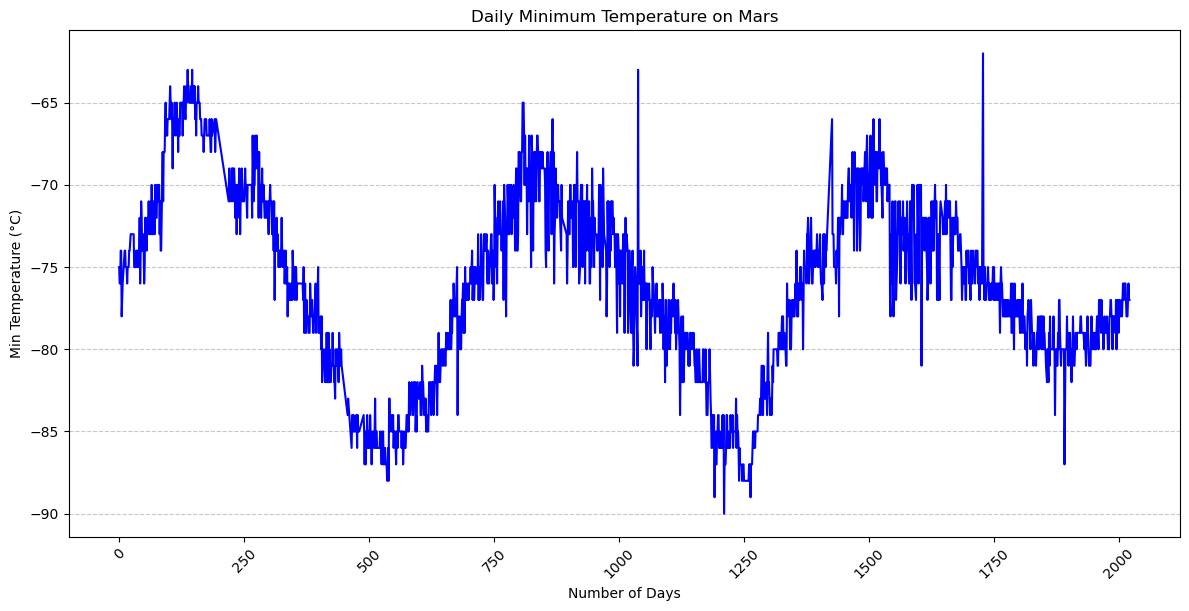

In [38]:
# 5. How many terrestrial (earth) days are there in a Martian year?
daily_min_temp_data['Date'] = (daily_min_temp_data['Date'] - daily_min_temp_data['Date'].min()).dt.days

# Plot the daily minimum temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_min_temp_data['Date'], daily_min_temp_data['Min Temperature (°C)'], color='blue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Days')
plt.ylabel('Min Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV


In [29]:
# Specify the file path where you want to save the CSV file
file_path = 'mars_data.csv'

# Use the to_csv method to write the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f'Data has been saved to {file_path}')

Data has been saved to mars_data.csv


In [30]:
browser.quit()